In [1]:
from draw_analysis.get_api import GetApiFootballData
from draw_analysis.team_draw_analysis import TeamDrawAnalysis
import matplotlib.pyplot as plt
import pandas as pd
%run api_credentials.ipynb

In [2]:
api = GetApiFootballData(credentials)

Response status code: 200
Connection successfull.


In [3]:
spain = api.get_country_leagues_overview('Spain')
spain.head()

,league.name,league.type,country.name
league.id,,,
140,La Liga,League,Spain
141,Segunda Division,League,Spain
142,Primera Division Women,League,Spain
556,Super Cup,Cup,Spain
143,Copa del Rey,Cup,Spain


In [4]:
api.get_seasons_details(141)

country.name               Spain
league.name     Segunda Division
Name: 141, dtype: object


,year,start,end
0,2016,2016-08-19,2017-06-24
1,2017,2017-08-18,2018-06-16
2,2018,2018-08-17,2019-06-16
3,2019,2019-08-17,2020-08-23
4,2020,2020-09-12,2021-06-20
5,2021,2021-08-13,2022-05-29


In [5]:
fixtures_raw_data = api.get_fixtures_data(league_id=141, seasons=[2015, 2016, 2017,2018,2019,2020])

In [6]:
data = TeamDrawAnalysis(fixtures_raw_data)

 Data description: 
	Country: Spain 
 	League name: Segunda Division 
 	League id: 141 
 	Seasons: 2016, 2017, 2018, 2019, 2020 



In [7]:
combined = data.standings_draws()
combined

,2016,2017,2018,2019,2020
1,9,13,9,7,10
2,10,12,13,12,10
3,14,11,11,11,10
4,18,8,14,13,10
5,16,10,12,12,11
6,15,11,17,13,10
7,9,11,16,21,14
8,10,16,12,15,12
9,16,16,13,15,14
10,13,10,15,18,12


In [8]:
#total average number of draws per season
for season in combined.columns:
    print (f'{season} - {combined[season].mean():.2f}')

2016 - 13.27
2017 - 12.00
2018 - 13.00
2019 - 14.27
2020 - 12.09


In [9]:
# median number of draws per season
for season in combined.columns:
    print (f'{season} - {combined[season].median()}')

2016 - 14.0
2017 - 11.5
2018 - 13.0
2019 - 13.5
2020 - 11.5


<AxesSubplot:>

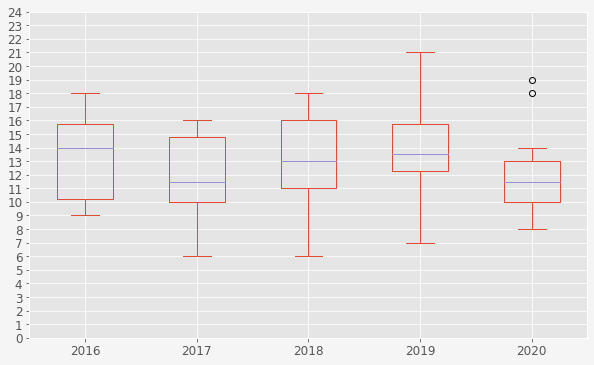

In [10]:
combined[['2016', '2017', '2018', '2019','2020']].plot(kind='box', yticks=range(0,25))

<AxesSubplot:>

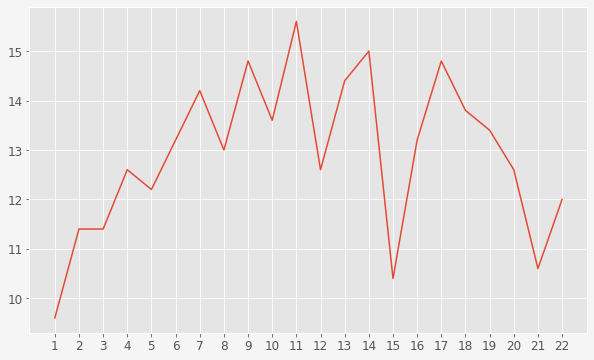

In [11]:
combined.mean(axis=1).plot(xticks=range(1,23))

<AxesSubplot:>

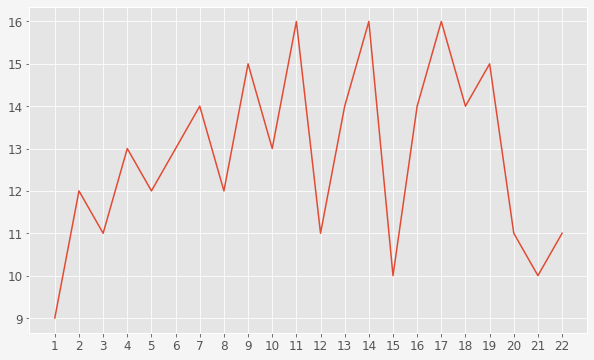

In [12]:
combined.median(axis=1).plot(xticks=range(1,23))

<AxesSubplot:>

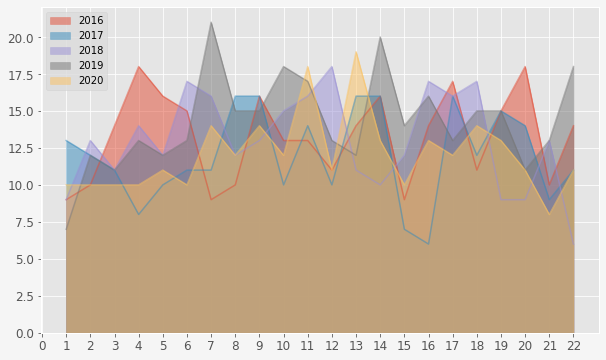

In [13]:
combined.plot.area(stacked=False, xticks=range(0,23))

<AxesSubplot:>

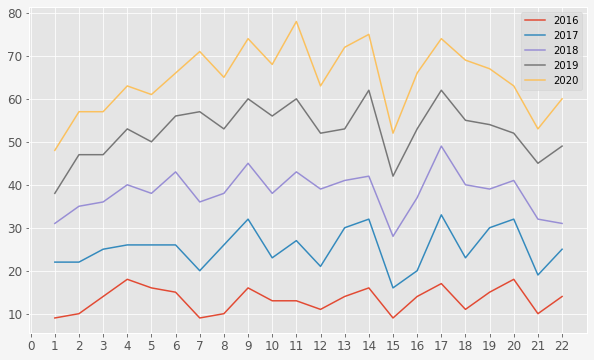

In [14]:
combined.plot(stacked = True, xticks=range(0,23))

<AxesSubplot:ylabel='Density'>

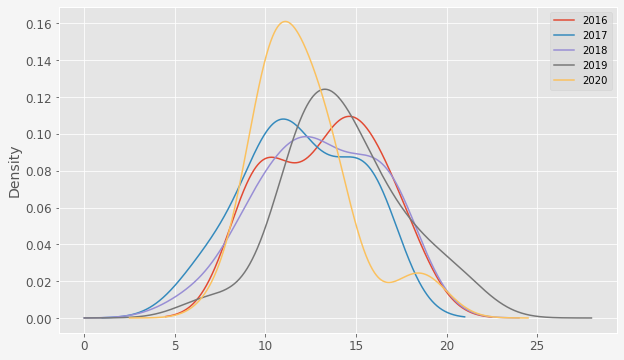

In [15]:
combined.plot(kind='kde',)